In [1]:
%tensorflow_version 2.x
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


In [25]:
import numpy as np

from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense
from tensorflow.keras.models import Sequential

# CNN

## 하이퍼파라미터 정의

In [32]:
EPOCHS = 100

## 네트워크 구조

In [23]:
def MyModel():
  return Sequential([Conv2D(32, (3, 3), padding='same', activation='relu'), # 28x28x32
                     MaxPool2D(), # 14x14x32
                     Conv2D(64, (3, 3), padding='same', activation='relu'), # 14x14x64
                     MaxPool2D(), # 7x7x64
                     Conv2D(128, (3, 3), padding='same', activation='relu'), # 7x7x128
                     Flatten(), # 6272
                     Dense(128, activation='relu'),
                     Dense(10, activation='softmax')]) # 128

## 데이터 불러오기

In [7]:
fashion_mnist = tf.keras.datasets.fashion_mnist

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
x_train, x_test = x_train/255.0, x_test/255.0

x_train = x_train.astype(np.float32)
x_test = x_test.astype(np.float32)

# NHWC
x_train = x_train[..., np.newaxis]
x_test = x_test[..., np.newaxis]

train_ds = tf.data.Dataset.from_tensor_slices((x_train, y_train)).shuffle(10000).batch(32).prefetch(2048)
test_ds = tf.data.Dataset.from_tensor_slices((x_train, y_train)).batch(32).prefetch(2048)

In [8]:
print(x_train.shape, x_train[0].shape)

(60000, 28, 28, 1) (28, 28, 1)


## 모델 생성

In [26]:
model = MyModel()

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

## 모델 학습

In [33]:
history = model.fit(train_ds, validation_data=test_ds, epochs=EPOCHS)

Epoch 1/100
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0265 - accuracy: 0.9914 - val_loss: 0.0203 - val_accuracy: 0.9936
Epoch 2/100
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0268 - accuracy: 0.9912 - val_loss: 0.0207 - val_accuracy: 0.9929
Epoch 3/100
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0194 - accuracy: 0.9932 - val_loss: 0.0653 - val_accuracy: 0.9800
Epoch 4/100
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0263 - accuracy: 0.9917 - val_loss: 0.0181 - val_accuracy: 0.9939
Epoch 5/100
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0192 - accuracy: 0.9938 - val_loss: 0.0160 - val_accuracy: 0.9942
Epoch 6/100
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0267 - accuracy: 0.9916 - val_loss: 0.0253 - val_accuracy: 0.9913
Epoch 7/100
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0209 - accuracy: 0.9935 - val_loss: 0.0152 -

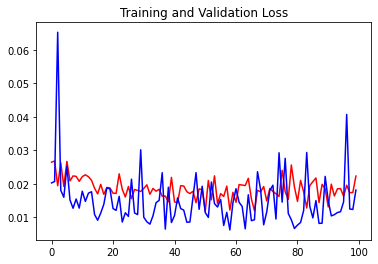

In [42]:
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure()
plt.plot(loss, 'r')
plt.plot(val_loss, 'b')
plt.title('Training and Validation Loss')
plt.show()

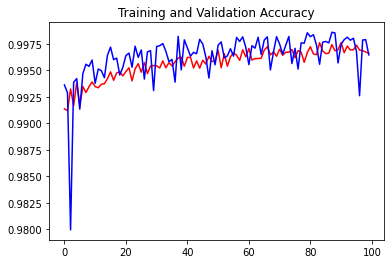

In [43]:
plt.figure()
plt.plot(history.history['accuracy'], 'r')
plt.plot(history.history['val_accuracy'], 'b')
plt.title('Training and Validation Accuracy')
plt.show()